# Window Trigger Rates

The command used to generate this notebook was: `./scanwindow -r0-12-0.05 -w71 -v3`  

Meaning that it took data from 0 MeV to 12 MeV, each bin having a width of 0.05 and taking data for 710 seconds or 11:50 minutes per bin.

This data was taken with the PuBe source.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import lmfit as lf
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline as interp

In [2]:
#Import data
dataPuBe = pd.read_csv ("data/17-nov-2023.csv")
thslPuBe = dataPuBe.iloc[:,0]
thsuPuBe = dataPuBe.iloc[:,1]
ratePuBe = dataPuBe.iloc[:,2]

thrsPuBe = [x + 0.05/2 for x in thslPuBe]

#Cut an ill-behaved region
#ratePuBe = ratePuBe[thrsPuBe > 220]
#thrsPuBe = thrsPuBe[thrsPuBe > 220]

del dataPuBe

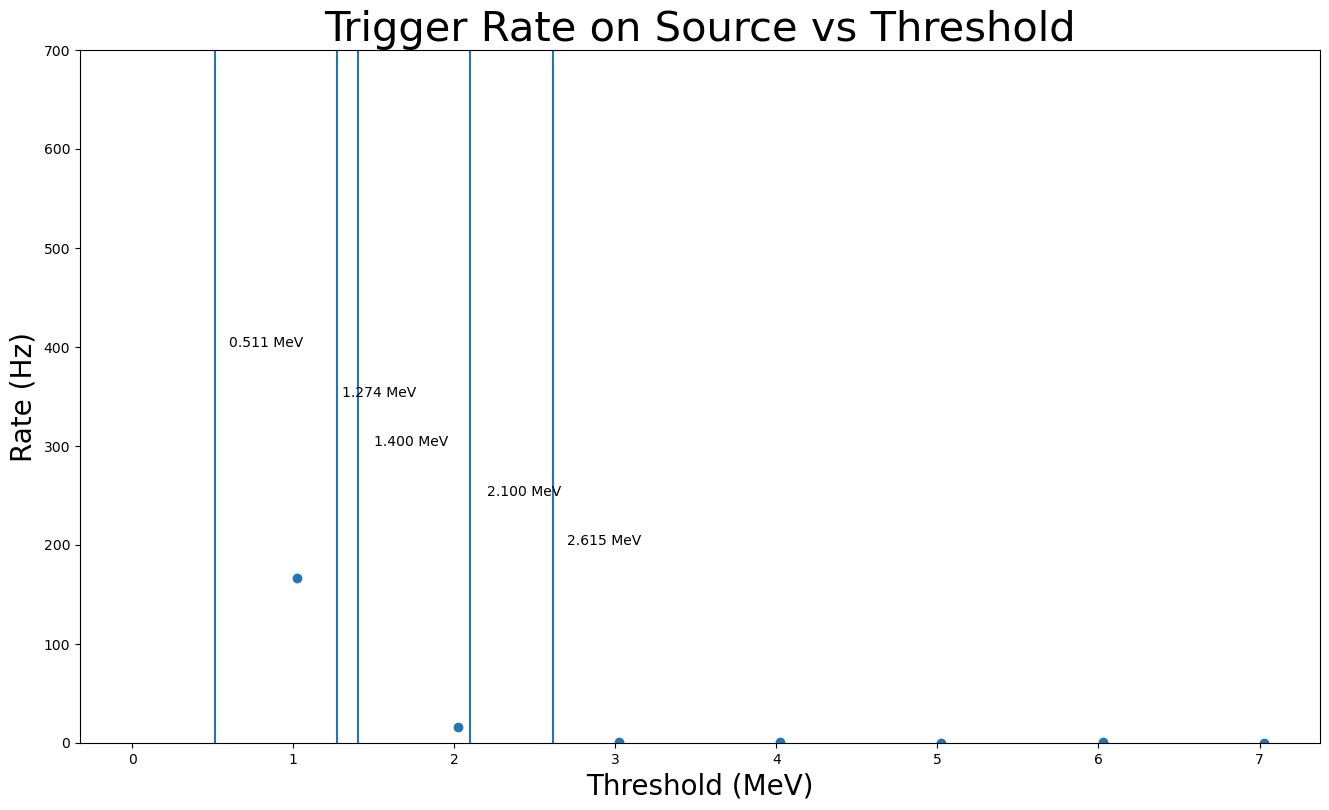

Note: threshold refers to average of upper and lower thresholds; in this case, the lower threshold + 0.05 MeV.


In [3]:
plt.figure(figsize=(16,9))

plt.scatter(thrsPuBe,ratePuBe,label="Data")

plt.xlabel("Threshold (MeV)",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.title("Trigger Rate on Source vs Threshold",size=30)
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
#plt.yscale('log')
#plt.xlim(150)
plt.axvline(0.511)
plt.text(0.6,400,"0.511 MeV")
plt.axvline(1.274)
plt.text(1.3,350,"1.274 MeV")
plt.axvline(1.400)
plt.text(1.500,300,"1.400 MeV")
plt.axvline(2.100)
plt.text(2.200,250,"2.100 MeV")
plt.axvline(2.615)
plt.text(2.7,200,"2.615 MeV")
plt.ylim(0,700)

#plt.legend()
plt.show()
print("Note: threshold refers to average of upper and lower thresholds; in this case, the lower threshold + 0.05 MeV.")